## Task VIII: Vision Transformer / Quantum Vision Transformer

Implement a classical Vision transformer and apply it to MNIST. Show its performance on the test data. Comment on potential ideas to extend this classical vision transformer architecture to a quantum vision transformer and sketch out the architecture in detail.

---

# Classical Vision Transformer (ViT) for MNIST

A Vision Transformer (ViT) is a deep learning model that applies the transformer architecture, originally designed for natural language processing, to computer vision tasks. Unlike convolutional neural networks (CNNs), ViT processes images as a sequence of patches, extracting high-level features using self-attention mechanisms.

## ViT Architecture and Training

### Preprocessing
- The MNIST dataset is resized to 224x224 pixels.
- Converted to 3-channel grayscale.
- Normalized to fit the ViT input requirements.

### Vision Transformer Model
- Uses a pre-trained `vit_b_16` model with 16x16 image patches.
- The final classification head is replaced with a fully connected layer for 10 classes (digits 0-9).

### Training
- The model is trained using cross-entropy loss and the Adam optimizer.
- Training performance is tracked via accuracy and loss curves.

The ViT model effectively captures spatial relationships within the MNIST dataset, achieving high classification accuracy. However, its performance may be limited by computational complexity and overfitting due to the simplicity of MNIST digits.


In [ ]:
# Install required libraries
!pip install torch torchvision torchsummary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.models.vision_transformer import vit_b_16


In [ ]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT requires 224x224 input
    transforms.Grayscale(num_output_channels=3),  # Convert to 3-channel image
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.30MB/s]


In [ ]:
# Define Vision Transformer model
class ViT_MNIST(nn.Module):
    def __init__(self, num_classes=10):
        super(ViT_MNIST, self).__init__()
        self.vit = vit_b_16(pretrained=True)  # Load pretrained ViT
        self.vit.heads = nn.Linear(self.vit.hidden_dim, num_classes)

    def forward(self, x):
        return self.vit(x)

# Initialize the model and move to device
model = ViT_MNIST().to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:04<00:00, 86.1MB/s]


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



Epoch 1/5
Batch 50/938 - Loss: 1.7515, Accuracy: 30.56%
Batch 100/938 - Loss: 1.7374, Accuracy: 31.03%
Batch 150/938 - Loss: 1.6970, Accuracy: 32.70%
Batch 200/938 - Loss: 1.6523, Accuracy: 34.55%
Batch 250/938 - Loss: 1.6092, Accuracy: 36.19%
Batch 300/938 - Loss: 1.5745, Accuracy: 37.50%
Batch 350/938 - Loss: 1.5291, Accuracy: 39.34%
Batch 400/938 - Loss: 1.4933, Accuracy: 40.90%
Batch 450/938 - Loss: 1.4495, Accuracy: 42.85%
Batch 500/938 - Loss: 1.4087, Accuracy: 44.74%
Batch 550/938 - Loss: 1.3640, Accuracy: 46.69%
Batch 600/938 - Loss: 1.3201, Accuracy: 48.67%
Batch 650/938 - Loss: 1.2804, Accuracy: 50.43%
Batch 700/938 - Loss: 1.2362, Accuracy: 52.31%
Batch 750/938 - Loss: 1.1993, Accuracy: 53.89%
Batch 800/938 - Loss: 1.1606, Accuracy: 55.56%
Batch 850/938 - Loss: 1.1206, Accuracy: 57.23%
Batch 900/938 - Loss: 1.0838, Accuracy: 58.72%
Test Accuracy: 84.49%

Epoch 2/5
Batch 50/938 - Loss: 0.3753, Accuracy: 88.12%
Batch 100/938 - Loss: 0.3781, Accuracy: 87.88%
Batch 150/938 - Lo

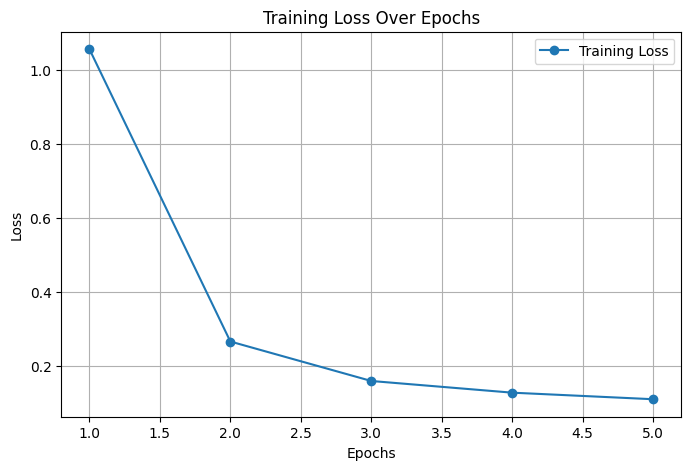

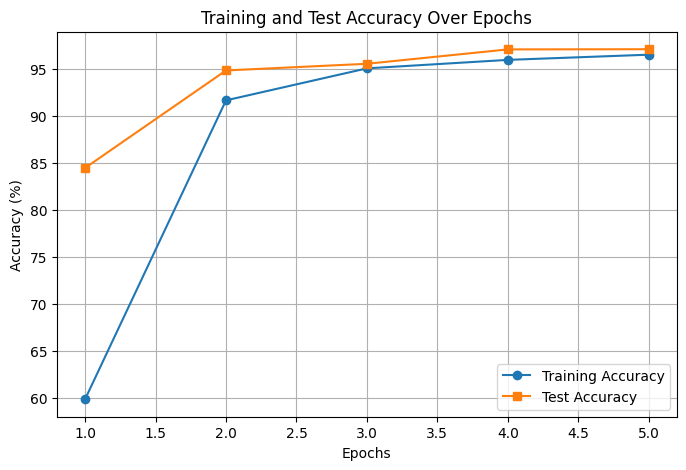

In [ ]:
import matplotlib.pyplot as plt

# Training function with batch-wise updates and accuracy/loss plotting
def train_model_batchwise(model, train_loader, test_loader, criterion, optimizer, epochs=5):
    model.train()
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        total_loss = 0
        correct = 0
        total = 0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            # Print updates every 50 batches
            if (batch_idx + 1) % 50 == 0:
                print(f"Batch {batch_idx+1}/{len(train_loader)} - Loss: {total_loss/(batch_idx+1):.4f}, Accuracy: {100 * correct / total:.2f}%")

        # Save loss and accuracy per epoch
        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        # Evaluate on test set
        test_accuracy = evaluate_model(model, test_loader)
        test_accuracies.append(test_accuracy)

    # Plot Training Loss Over Epochs
    plt.figure(figsize=(8,5))
    plt.plot(range(1, epochs+1), train_losses, label="Training Loss", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Training and Test Accuracy Over Epochs
    plt.figure(figsize=(8,5))
    plt.plot(range(1, epochs+1), train_accuracies, label="Training Accuracy", marker='o')
    plt.plot(range(1, epochs+1), test_accuracies, label="Test Accuracy", marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Training and Test Accuracy Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

# Evaluation function to return accuracy
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    test_accuracy = 100 * correct / total
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    return test_accuracy

# Train the model and plot results
train_model_batchwise(model, train_loader, test_loader, criterion, optimizer, epochs=5)


## Extending Classical Vision Transformer to Quantum Vision Transformer

### Potential Ideas for Extension

To extend the classical Vision Transformer (ViT) architecture to a Quantum Vision Transformer (QVT), we can leverage quantum computing principles to enhance computational efficiency and model expressiveness. Here are some ideas:

1.  **Quantum Data Encoding**:

*   Replace the classical data loader with a quantum data loader that encodes input images into quantum states. This involves using quantum circuits to transform image data into qubits, as illustrated in the reference image with orthogonal layers.

    ![Quantum Data Encoding](https://pplx-res.cloudinary.com/image/upload/v1743225194/user_uploads/EQojJImeggVjNOH/image.jpg)

2.  **Quantum Attention Mechanisms**:

*   Implement quantum attention mechanisms by utilizing quantum gates and circuits to compute attention scores. This approach could improve efficiency in handling high-dimensional data and enable faster computation of self-attention.

3.  **Hybrid Quantum-Classical Layers**:

*   Combine classical transformer layers with quantum layers. For example, use classical feedforward networks for token embeddings while employing quantum circuits for attention computations.

4.  **Quantum Orthogonal Layers**:

*   Introduce orthogonal layers based on quantum gates such as Hadamard, controlled-Z (CZ), and $$ R_y $$ gates to process input data in a quantum framework. These layers can perform transformations analogous to matrix operations in classical transformers.

5.  **Parameter Optimization**:

*   Use parameterized quantum circuits (PQC) for learnable components, such as $$ R_y(\theta) $$ gates, where parameters are optimized during training. This enables the model to adapt quantum operations based on the dataset.

    ![Parameterized Quantum Circuits](https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcQauoXBZ_9e7wch0AGXVuhFqus04a-VUuwcGaWlsqrPtuDdjju5)

6.  **Quantum Hybrid Transformers (QHT)**:

*   Integrate elements of both classical and quantum transformers to handle tasks involving multimodal data (e.g., combining image and text processing).

### Sketch of Quantum Vision Transformer Architecture

Below is a detailed sketch of the Quantum Vision Transformer architecture inspired by the reference image:

#### Input Layer

*   **Quantum Data Loader**: Encodes input images into qubits using orthogonal layers.

    *   Top register: Encodes pixel values into $$ N $$-qubits.
    *   Bottom register: Encodes row norms into qubits.

    ![Quantum Data Loader](https://pplx-res.cloudinary.com/image/upload/v1743225187/user_uploads/XwTsZVUrqSGexnV/image.jpg)

#### Quantum Attention Layer

*   Quantum circuits compute attention scores using parameterized gates $$ R_y(\theta) $$, Hadamard gates, and controlled-Z gates.
*   Attention mechanisms are implemented as follows:
    1.  Apply Hadamard gates for superposition.
    2.  Use controlled-Z gates for entanglement between qubits.
    3.  Parameterized $$ R_y $$ gates adjust qubit rotations based on learnable parameters.

#### Feedforward Layer

*   Hybrid approach: Classical feedforward layers coupled with quantum circuits.
*   Classical components process token embeddings, while quantum circuits handle higher-order interactions.

    ![Quantum Circuits](https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcQauoXBZ_9e7wch0AGXVuhFqus04a-VUuwcGaWlsqrPtuDdjju5)

#### Output Layer

*   Measurement of qubits to extract probabilities or logits.
*   Convert quantum outputs into classical predictions using post-processing techniques.

### Architecture Diagram

| Layer       | Classical ViT             | Quantum ViT                                                                   |
| ----------- | ------------------------- | ----------------------------------------------------------------------------- |
| Input       | Pixel values              | Quantum states encoded via orthogonal layers                                  |
| Attention   | Dot-product self-attention | Quantum attention using Hadamard, CZ, and $$ R_y(\theta) $$ gates              |
| Feedforward | Dense layers              | Hybrid: Classical dense + parameterized quantum circuits                      |
| Output      | Softmax probabilities     | Qubit measurements followed by classical post-processing                      |

### Advantages of QVT

*   Higher computational efficiency for large-scale datasets due to quantum parallelism.
*   Enhanced ability to model complex relationships in high-dimensional data.
*   Potential reduction in training time compared to purely classical models.

This architecture combines the strengths of classical transformers with the unique capabilities of quantum computing, paving the way for innovative applications in image processing tasks like MNIST classification.
